# Assignment 1 Overview

According to assignment specification, in this assignment, we will develop Python code to classify `Sneakers` versus `Sandals` using the Fashion-MNIST dataset by using logistic regression and k-NN classifiers. We will use Grid Search and cross-validation to find the optimal hyperparameters of the model (e.g., the regularisation hyperparameter) and discuss and interpret the different decisions and their impact on the model’s performance and interpretability.


# Get the Data

"Fashion-MNIST is a dataset motivated by the popular MNIST dataset used to classify handwritten digits. It contains examples of ten classes (e.g. sneakers, coats, sandals, trousers, pullovers, etc.). Fashion-MNIST has a training set with 60,000 examples and a test set with 10,000 examples. Each example is a 28 x 28 low-resolution and grayscale image (similar to the examples in MNIST) associated with a label from one of the ten classes."


## Load the Data


In [36]:
from pathlib import Path
import pandas as pd

train_set = pd.read_csv(Path("FMNIST_training_set.csv"), header=None)
test_set = pd.read_csv(Path("FMNIST_test_set.csv"), header=None)
train_labels = pd.read_csv(Path("FMNIST_training_set_labels.csv"), header=None)
test_labels = pd.read_csv(Path("FMNIST_test_set_labels.csv"), header=None)

## Take a Quick Look at the Data Structure


In [37]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: int64(784)
memory usage: 358.9 MB


In [38]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Filtering out "Sneakers" and "Sandals" Only


In [39]:
SNEAKER = 7
SANDAL = 5


def filter_data(labels, dataset):
    mask = labels.iloc[:, 0].isin([SNEAKER, SANDAL])
    labels_filtered = labels[mask]
    # Replace 5 with 1, replace 7 with 0
    labels_filtered = labels_filtered.iloc[:, 0].replace({5: 1, 7: 0})
    dataset_filtered = dataset[mask]
    return labels_filtered, dataset_filtered


# For the training data
train_labels, train_set = filter_data(
    train_labels, train_set)

# For the test data
test_labels, test_set = filter_data(test_labels, test_set)

## Task D1


In [40]:
# Configure save image
# Reference: https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, bbox_inches='tight', pad_inches=0.3, ** kwargs):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution,
                bbox_inches=bbox_inches, pad_inches=pad_inches, **kwargs)

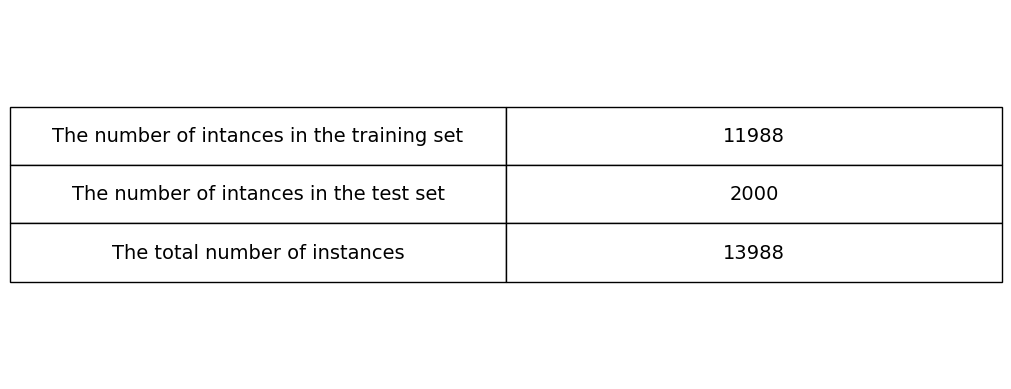

In [41]:
# Get the number of intances in the training set and test set
nrows_train_set = len(train_set)
nrows_test_set = len(test_set)
total_instances = nrows_train_set + nrows_test_set

table_content = [['The number of intances in the training set', nrows_train_set], [
    'The number of intances in the test set', nrows_test_set], ['The total number of instances', total_instances]]

# How to plot a table?
# Reference: https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
# https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
# https://matplotlib.org/stable/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.margins(x=0, y=0)
table = ax.table(cellText=table_content, loc='center', cellLoc='center')
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(14)

# Adjust cell heights and widths
table.scale(2, 3.5)
save_fig("d1", tight_layout=False, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [42]:
test_labels

8       1
9       0
11      1
12      0
21      1
       ..
9976    1
9986    0
9987    1
9990    1
9999    1
Name: 0, Length: 2000, dtype: int64

In [43]:
test_set

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,80,77,0,0,0


In [44]:
train_labels

12       1
30       1
36       1
41       0
43       1
        ..
59979    0
59983    1
59992    0
59995    1
59999    1
Name: 0, Length: 11988, dtype: int64

In [45]:
train_set

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,65,53,45,33,17,0,0,0,0,0
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Task D2


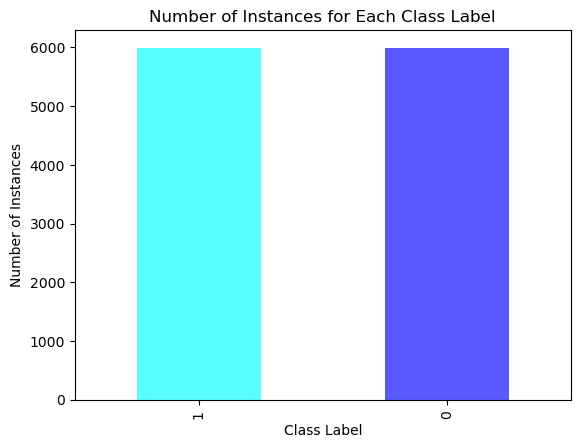

In [46]:
# Provide a bar plot showing the number of instances for each class label
cmap = plt.get_cmap('viridis')

class_counts = train_labels.value_counts()
class_counts.plot(kind='bar', color=['cyan', 'blue'], alpha=0.65)

plt.xlabel('Class Label')
plt.ylabel('Number of Instances')
plt.title('Number of Instances for Each Class Label')
save_fig("d2_class_label_balance", tight_layout=False)
plt.show()

## Task D3

Plot the first six images/examples from each class with the corresponding example id and associated label on the top of the plot.


### Plot A Single Shoe


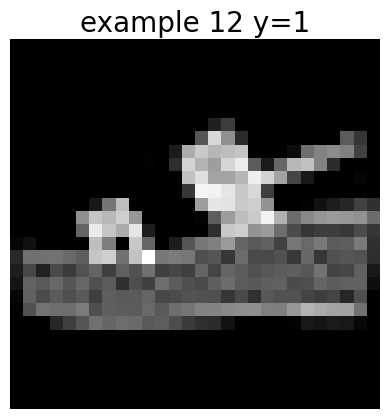

In [47]:
import matplotlib.pyplot as plt


def plot_shoe(image_data, id, label):

    image = image_data.reshape(28, 28)
    title = 'example '+str(id)+' y='+str(label)
    plt.imshow(1-image, cmap="binary")

    plt.axis("off")
    plt.title(title, fontsize=20)


some_shoe = train_set.iloc[0].to_numpy()
plot_shoe(some_shoe, train_set.index[0], train_labels.iloc[0])
plt.show()

### Filter Data

Get data of the first six images/examples from each class.


In [48]:
count = 0
count_0 = 0
count_1 = 0
idx = 0
selected_indices = []
example_ids = []
example_labels = []

while count < 12:
    label = train_labels.iloc[idx]
    if label == 1 and count_1 < 6:
        count += 1
        count_1 += 1
        selected_indices.extend([idx])
        example_ids.extend([train_set.index[idx]])
        example_labels.extend([1])
    elif label == 0 and count_0 < 6:
        count += 1
        count_0 += 1
        selected_indices.extend([idx])
        example_ids.extend([train_set.index[idx]])
        example_labels.extend([0])
    idx += 1

# print(selected_indices)
# print(example_ids)
# print(example_labels)

selected_data = train_set.iloc[selected_indices]
# selected_data

### Plot Shoes


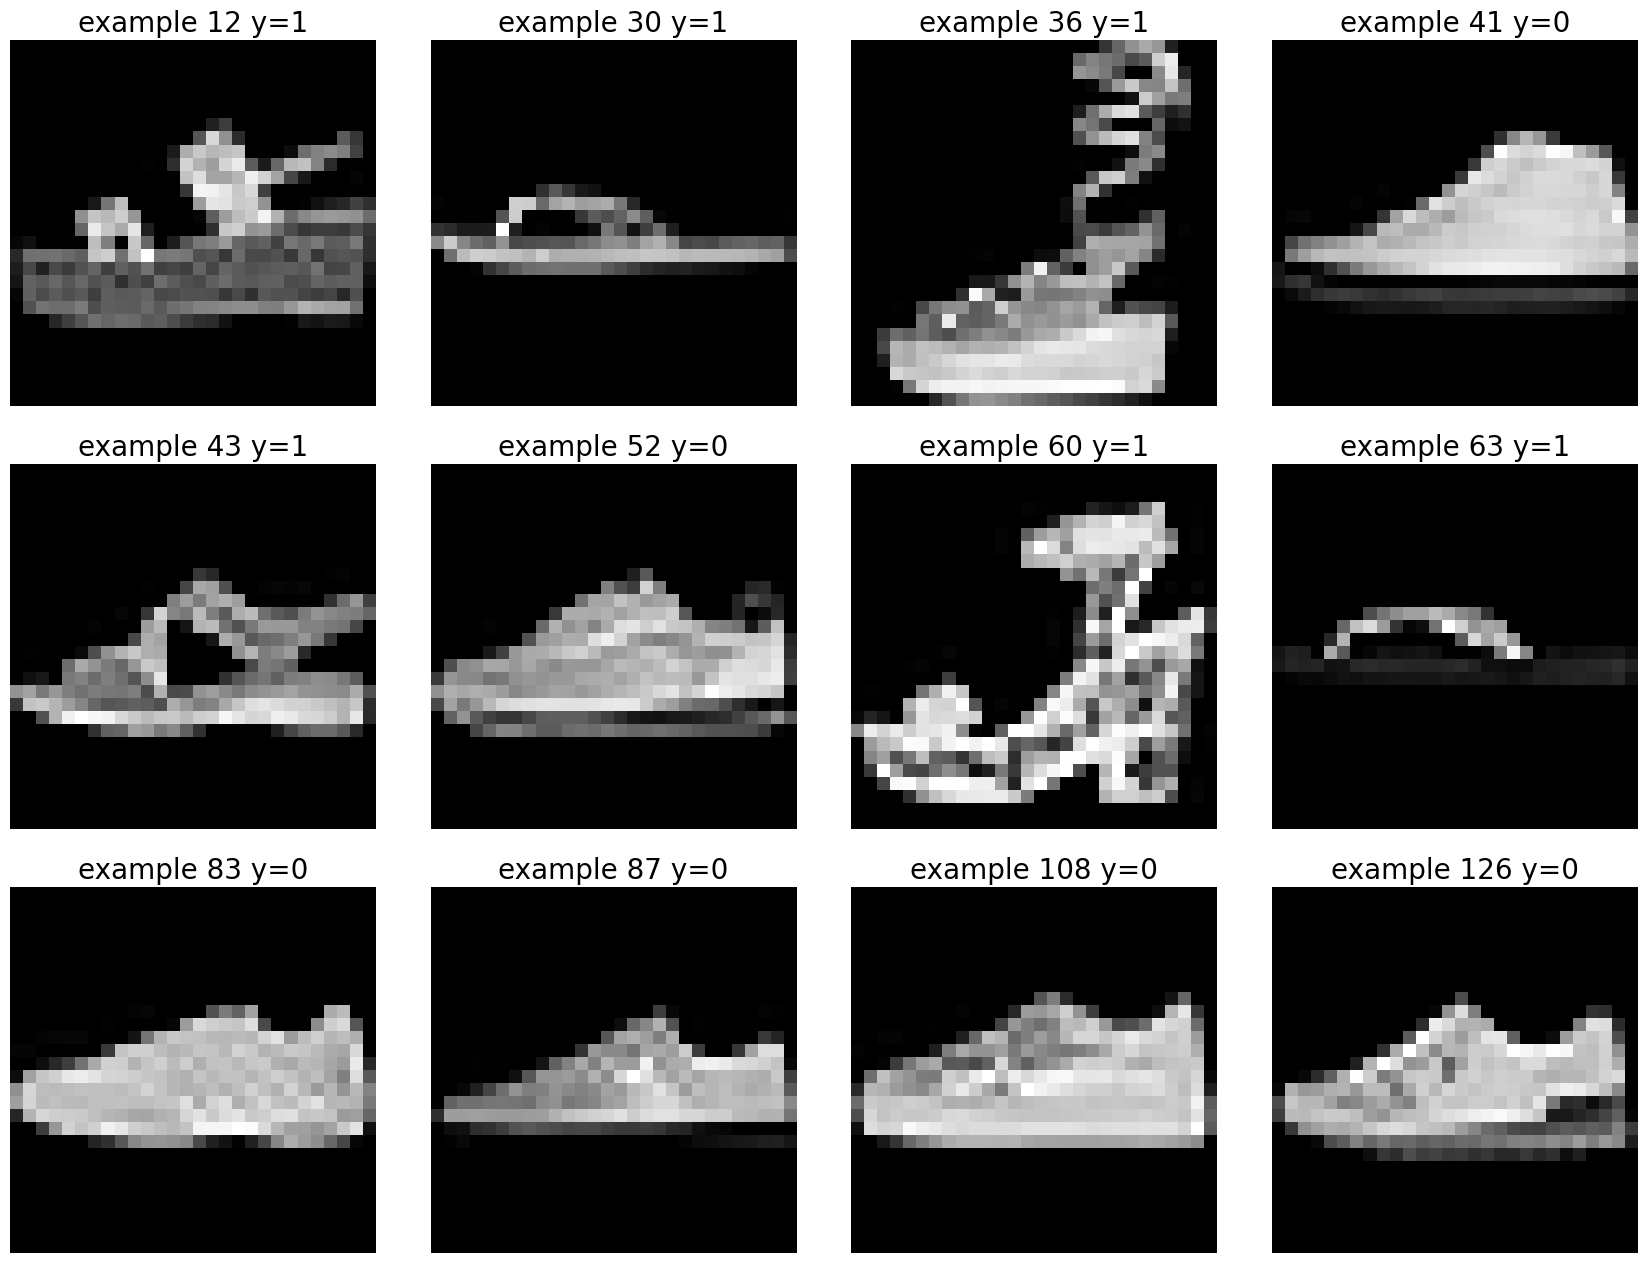

In [49]:
plt.figure(figsize=(21, 16))
for idx, image_data in enumerate(selected_data.to_numpy()):
    plt.subplot(3, 4, idx + 1)
    plot_shoe(image_data, example_ids[idx], example_labels[idx])

plt.subplots_adjust(wspace=0.15, hspace=0.1)
save_fig("d3_shoes_plot", tight_layout=False)
plt.show()

# Implement Logistic Regression from Scratch


## Split Data

Split your training data (that you constructed on “summarising the datasets”) into two sets: training and validation. Select randomly 80% for training and 20% for validation.


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    train_set, train_labels, test_size=0.2, random_state=5508)

## Add Dummy Feature and Scale Features


In [115]:
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import add_dummy_feature
from sklearn.metrics import accuracy_score


random.seed(5508)

# Add x0=1 to every instance
X_train_b = add_dummy_feature(X_train)
X_val_b = add_dummy_feature(X_val)
X_test_b = add_dummy_feature(test_set)


N_EPOCHS = 10000

# Reference: https://www.geeksforgeeks.org/ml-feature-scaling-part-2/?ref=header_search
std_scaler = StandardScaler()
x_train_b_scaled = std_scaler.fit_transform(X_train_b)
x_val_b_scaled = std_scaler.transform(X_val_b)
x_test_b_scaled = std_scaler.transform(X_test_b)

## Define Logistic Regression Classifier


In [52]:
# Reference: https://www.kaggle.com/code/sugataghosh/implementing-logistic-regression-from-scratch/notebook
# Reference: https://github.com/casper-hansen/Logistic-Regression-From-Scratch/blob/main/src/logistic_regression/model.py
# Reference: https://atmamani.github.io/projects/ml/implementing-logistic-regression-in-python/
# Reference: https://www.kaggle.com/code/hamzaboulahia/logistic-regression-mnist-classification
class CustomLogisticRegression():
    def __init__(self, learning_rate):
        self.losses = []
        # explain in report: why accuracy? we have a balanced dataset
        self.train_accuracies = []
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    # Reference: https://stackoverflow.com/questions/40726490/overflow-error-in-pythons-numpy-exp-function
    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1/(1+z)
        else:
            z = np.exp(x)
            return z/(1+z)

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        loss = -(y_true * np.log(y_pred + epsilon) +
                 (1-y_true) * np.log(1 - y_pred + epsilon))
        return np.mean(loss)

    def compute_gradients(self, x, y_true, y_pred, n_samples):
        difference = y_pred-y_true
        return np.matmul(difference, x)/n_samples

    def fit(self, x, y, n_epochs):   # y.shape (m,)   x.shape(m,n)
        n_samples, n_features = x.shape
        self.theta = np.random.rand(n_features)  # (n,)

        for _ in range(n_epochs):
            z = np.matmul(x, self.theta)
            pred = self._sigmoid(z)  # estimate probability
            loss = self.compute_loss(y, pred)
            self.losses.append(loss)
            gradients = self.compute_gradients(x, y, pred, n_samples)
            self.theta -= self.learning_rate*gradients

            class_pred = [1 if p > 0.5 else 0 for p in pred]
            self.train_accuracies.append(accuracy_score(y, class_pred))

    def predict(self, x):
        threshold = 0.5
        pred = self._sigmoid(np.matmul(x, self.theta))
        class_pred = [1 if p > threshold else 0 for p in pred]
        return np.array(class_pred)

## Task D4

Experiment with some values for η, the learning rate of the gradient descent. Provide
plots to support your decision for the final value and justify your choice.


In [53]:
# # Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/multiple_figs_demo.html
# plt.figure(figsize=(15, 9))
# plt.figure(1)
# plt.figure(figsize=(15, 9))
# plt.figure(2)

# learning_rates = [1.5, 1.2, 1, 0.8, 0.5]
# # + [10**-i for i in range(1, 4)]

# for learning_rate in learning_rates:
#     print('training with learning rate = ', learning_rate)
#     model = CustomLogisticRegression(learning_rate)
#     model.fit(x_train_b_scaled, y_train, 10000)
#     plt.figure(1)
#     # Reference: https://blog.csdn.net/weixin_41608328/article/details/105227240
#     plt.plot(range(10000), model.losses, label=r'$\eta=$'+str(learning_rate))
#     plt.figure(2)
#     plt.plot(range(10000), model.train_accuracies,
#              label=r'$\eta=$'+str(learning_rate))

# plt.figure(1)
# plt.legend(loc='upper right')
# plt.xlabel('Number of Iterations')
# plt.ylabel('Cost')
# plt.title('Training Loss Over Iterations')
# save_fig("d4_training_loss1", tight_layout=False)
# plt.figure(2)
# plt.legend(loc='lower right')
# plt.xlabel('Number of Iterations')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Over Iterations')
# save_fig("d4_accuracy1", tight_layout=False)
# plt.show()

training with learning rate =  1.5
training with learning rate =  1.2
training with learning rate =  1
training with learning rate =  0.8
training with learning rate =  0.5


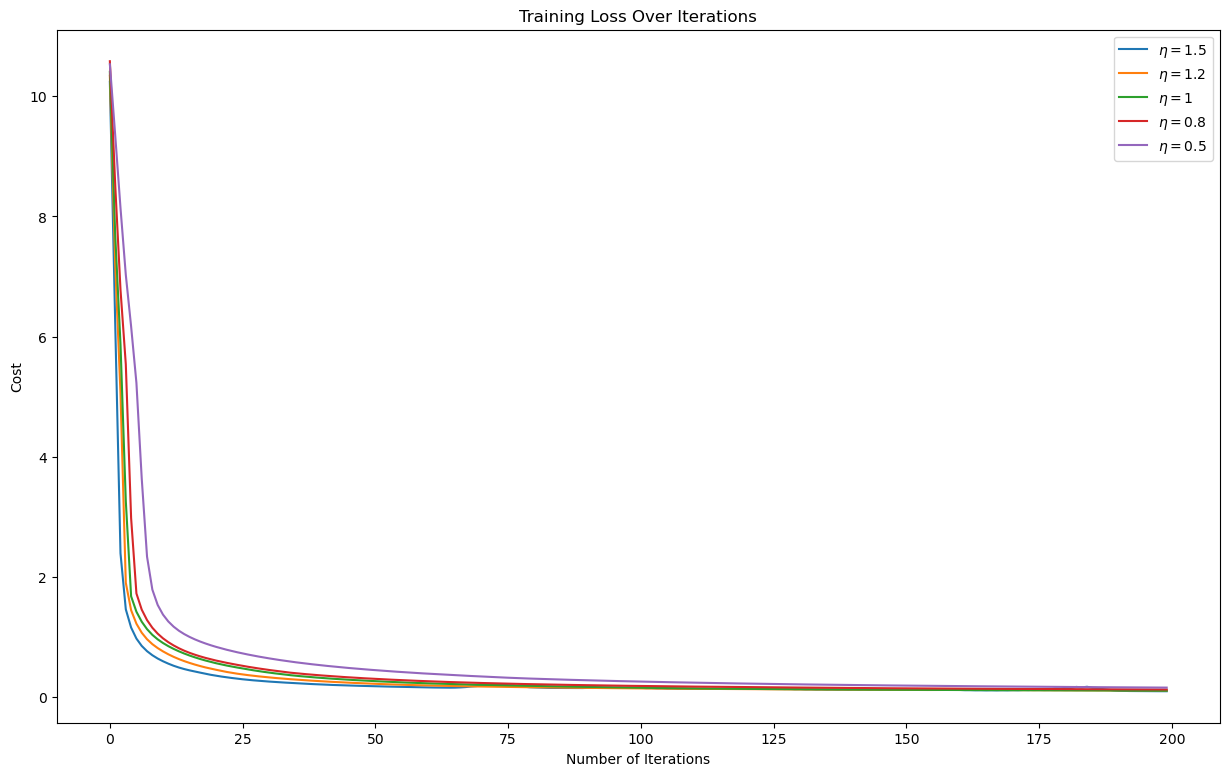

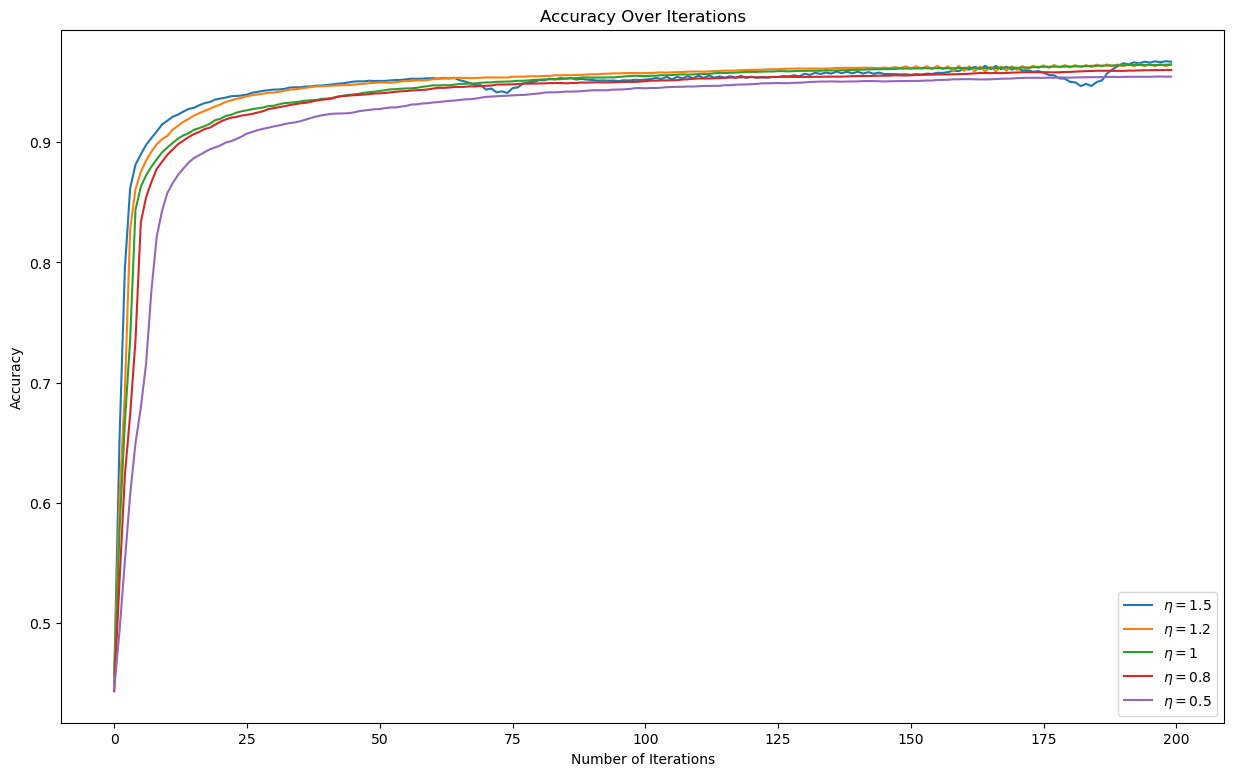

In [54]:
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/multiple_figs_demo.html
plt.figure(figsize=(15, 9))
plt.figure(1)
plt.figure(figsize=(15, 9))
plt.figure(2)

learning_rates = [1.5, 1.2, 1, 0.8, 0.5]
# + [10**-i for i in range(1, 4)]

for learning_rate in learning_rates:
    print('training with learning rate = ', learning_rate)
    model = CustomLogisticRegression(learning_rate)
    model.fit(x_train_b_scaled, y_train, 200)
    plt.figure(1)
    # Reference: https://blog.csdn.net/weixin_41608328/article/details/105227240
    plt.plot(range(200), model.losses, label=r'$\eta=$'+str(learning_rate))
    plt.figure(2)
    plt.plot(range(200), model.train_accuracies,
             label=r'$\eta=$'+str(learning_rate))

plt.figure(1)
plt.legend(loc='upper right')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Training Loss Over Iterations')
save_fig("d4_training_loss2", tight_layout=False)
plt.figure(2)
plt.legend(loc='lower right')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Iterations')
save_fig("d4_accuracy2", tight_layout=False)
plt.show()

## Task D5


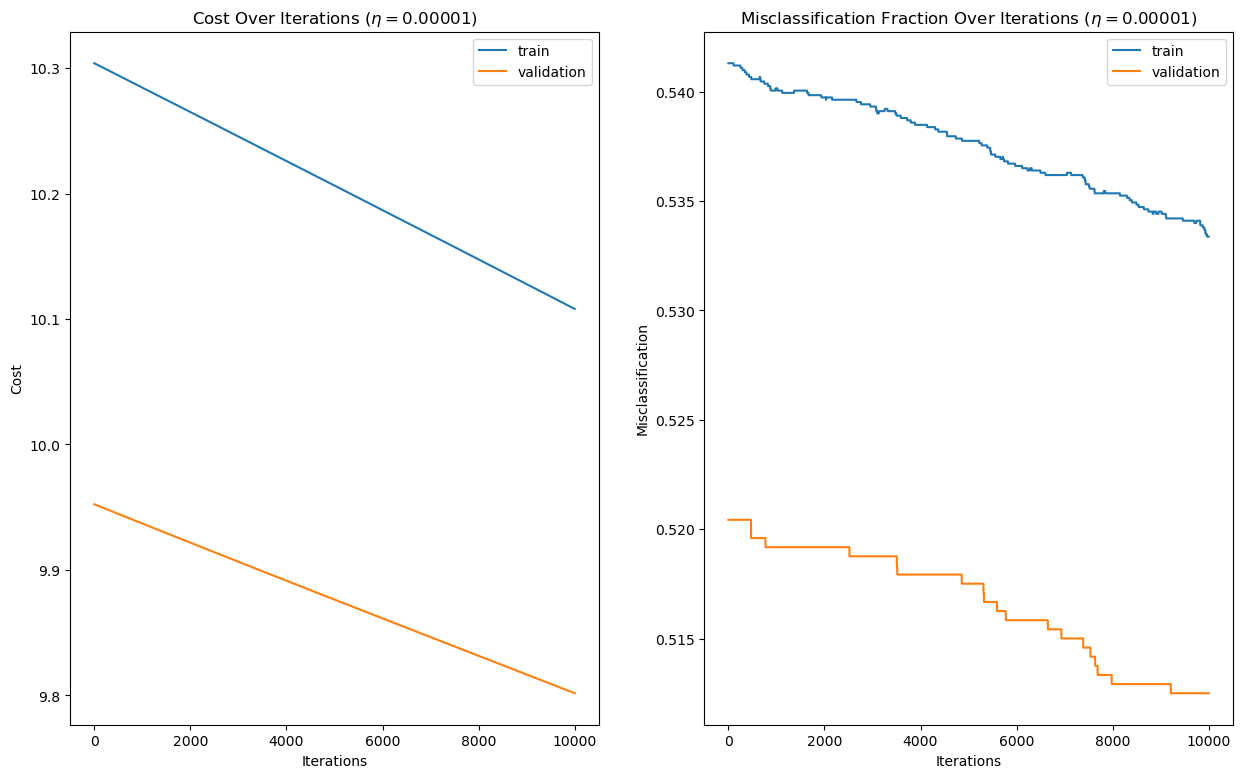

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

model1 = CustomLogisticRegression(1e-5)
model1.fit(x_train_b_scaled, y_train, 10000)
misclassification = [(1-accuracy) for accuracy in model1.train_accuracies]
ax1.plot(range(10000), model1.losses, label='train')
ax2.plot(range(10000), misclassification, label='train')

model2 = CustomLogisticRegression(1e-5)
model2.fit(x_val_b_scaled, y_val, 10000)

misclassification = [(1-accuracy) for accuracy in model2.train_accuracies]
ax1.plot(range(10000), model2.losses, label='validation')
ax2.plot(range(10000), misclassification, label='validation')

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
ax1.set_title(r'Cost Over Iterations ($\eta=0.00001$)')
ax1.legend(loc='upper right')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Misclassification')
ax2.set_title(r'Misclassification Fraction Over Iterations ($\eta=0.00001$)')
ax2.legend(loc='upper right')
save_fig("d5", tight_layout=False)
plt.show()

## Task D6


# Scikit-learn Logistic Regression Classifier

You will incorporate a L2 regularisation in your model. Your first task is to select an optimal value for the regularisation hyperparameter C (the hyperparameter α in the textbook) in the training set using the fixed validation set. You must use the same number of iterations as before and explore penalty strength values in the range given by np.logspace(-10, 5, 30) (this function will generate 30 numbers spaced evenly on a log scale).


In [56]:
# It is important to scale the data (e.g., using a StandardScaler) before performing ridge regression, as it is sensitive to the scale of the input features. This is true of most regularized models. (Source: Textbook)
x_train_scaled = std_scaler.fit_transform(X_train)
x_val_scaled = std_scaler.transform(X_val)


In [57]:
# Reference: https://towardsdatascience.com/implement-logistic-regression-with-l2-regularization-from-scratch-in-python-20bd4ee88a59
# https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/
# https://github.com/jstremme/l2-regularized-logistic-regression/blob/master/scikit-learn_comparison.ipynb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

C_range = np.logspace(-10, 5, 30)
train_losses = []
train_misclassifications = []
val_losses = []
val_misclassifications = []

for C in C_range:
    # Train your model for this C value
    model = LogisticRegression(
        penalty='l2', C=C, random_state=5508, max_iter=N_EPOCHS)
    model.fit(x_train_scaled, y_train)
    bias = model.intercept_
    weights = model.coef_
    theta = np.concatenate([bias, weights.ravel()])
    penalty = 1/C * np.sum(theta**2)
    # How to use predict_proba(): https://saturncloud.io/blog/how-to-use-logistic-regression-predictproba-method-in-scikitlearn/#how-to-use-predict_proba-method-in-scikit-learn
    # Compute the cost function on the training set
    #! Question: should I add penalty here for the ridge regularisation?
    train_pred = model.predict_proba(x_train_scaled)[:, 1]
    # train_loss = log_loss(y_train, train_pred) + penalty
    train_loss = log_loss(y_train, train_pred)
    train_losses.append([train_loss])
    # Compute the accuracy on the training set
    train_pred_class = (train_pred >= 0.5).astype(int)
    train_misclassification = 1-accuracy_score(y_train, train_pred_class)
    train_misclassifications.append([train_misclassification])

    # Compute the cost function on the validation set
    val_pred = model.predict_proba(
        x_val_scaled)[:, 1]
    # val_loss = log_loss(y_val, val_pred) + penalty
    val_loss = log_loss(y_val, val_pred)
    val_losses.append([val_loss])
    # Compute the accuracy on the validation set
    val_pred_class = (val_pred >= 0.5).astype(int)
    val_misclassification = 1-accuracy_score(y_val, val_pred_class)
    val_misclassifications.append([val_misclassification])

## Task D7

In the left plot, show the values of the cost function (y-axis) for each C value (x-axis) for the
training and validation sets. That is, your plot should contain two results.
In the right plot, show the fraction of misclassifications (y-axis) for each C value (x-axis) using the logistic regression model prediction for a threshold of 0.5. Similarly, you should provide two results (one for the training and one for the validation set).


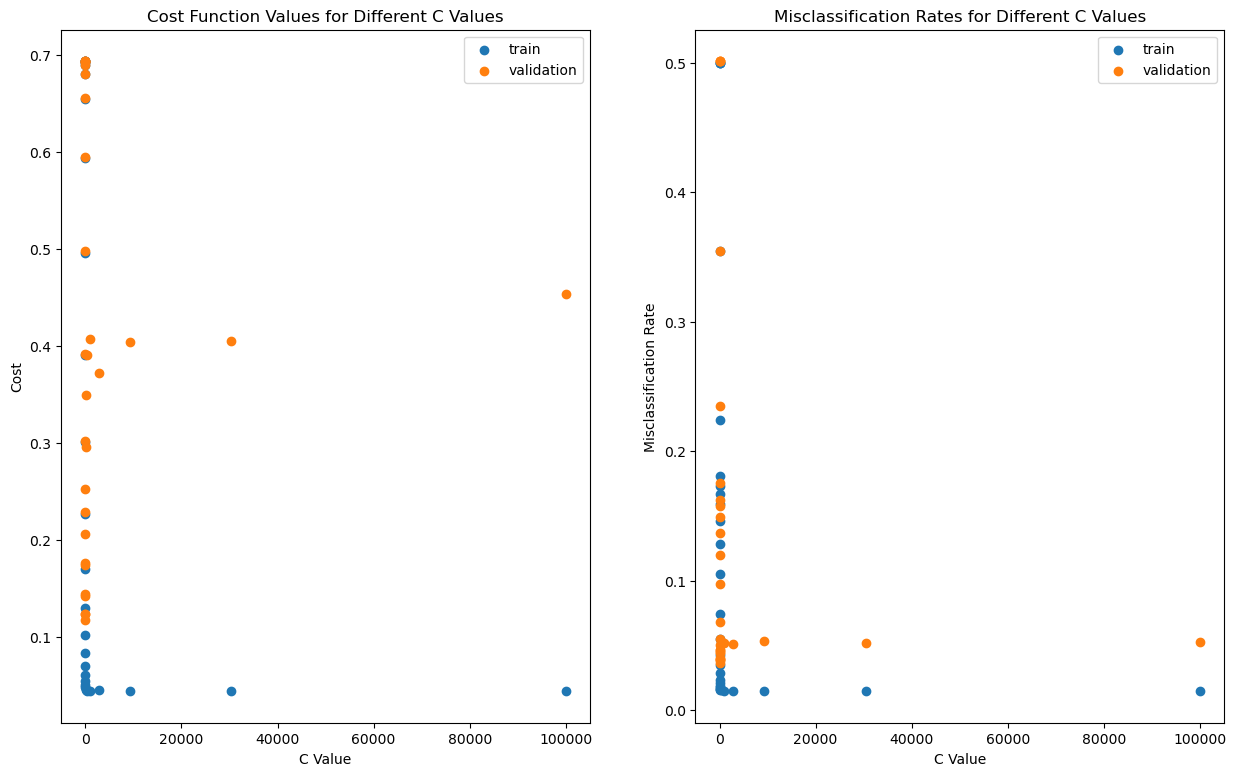

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

ax1.scatter(C_range, train_losses, label='train')
ax1.scatter(C_range, val_losses, label='validation')

ax2.scatter(C_range, train_misclassifications, label='train')
ax2.scatter(C_range, val_misclassifications, label='validation')

ax1.set_xlabel('C Value')
ax1.set_ylabel('Cost')
ax1.set_title(r'Cost Function Values for Different C Values')
ax1.legend(loc='upper right')
ax2.set_xlabel('C Value')
ax2.set_ylabel('Misclassification Rate')
ax2.set_title(r'Misclassification Rates for Different C Values')
ax2.legend(loc='upper right')
save_fig("d7", tight_layout=False)
plt.show()

## Task D8


In [59]:
# https://www.educative.io/answers/how-to-implement-crossvalscore-in-sklearn
from sklearn.linear_model import LogisticRegressionCV

C_float = [float(c) for c in C_range]

model = LogisticRegressionCV(
    Cs=C_float, cv=10, random_state=5508, penalty='l2', max_iter=N_EPOCHS, scoring='neg_log_loss')
model.fit(x_train_scaled, y_train)
# https://blog.csdn.net/evolution23/article/details/85028423
neg_losses = np.mean(model.scores_[1], axis=0)
losses = -neg_losses

model = LogisticRegressionCV(
    Cs=C_float, cv=10, random_state=5508, penalty='l2', max_iter=N_EPOCHS)
model.fit(x_train_scaled, y_train)
cv_accuracies = np.mean(model.scores_[1], axis=0)

When the mean cost is the smallest, C value =  0.018873918221350997
When the mean classification rate is the smallest, C value =  0.018873918221350997
When C value =  0.018873918221350997 , it has the smallest mean cost =  0.11364926010220341 , and the biggest accuracy rate =  0.9602711157455683


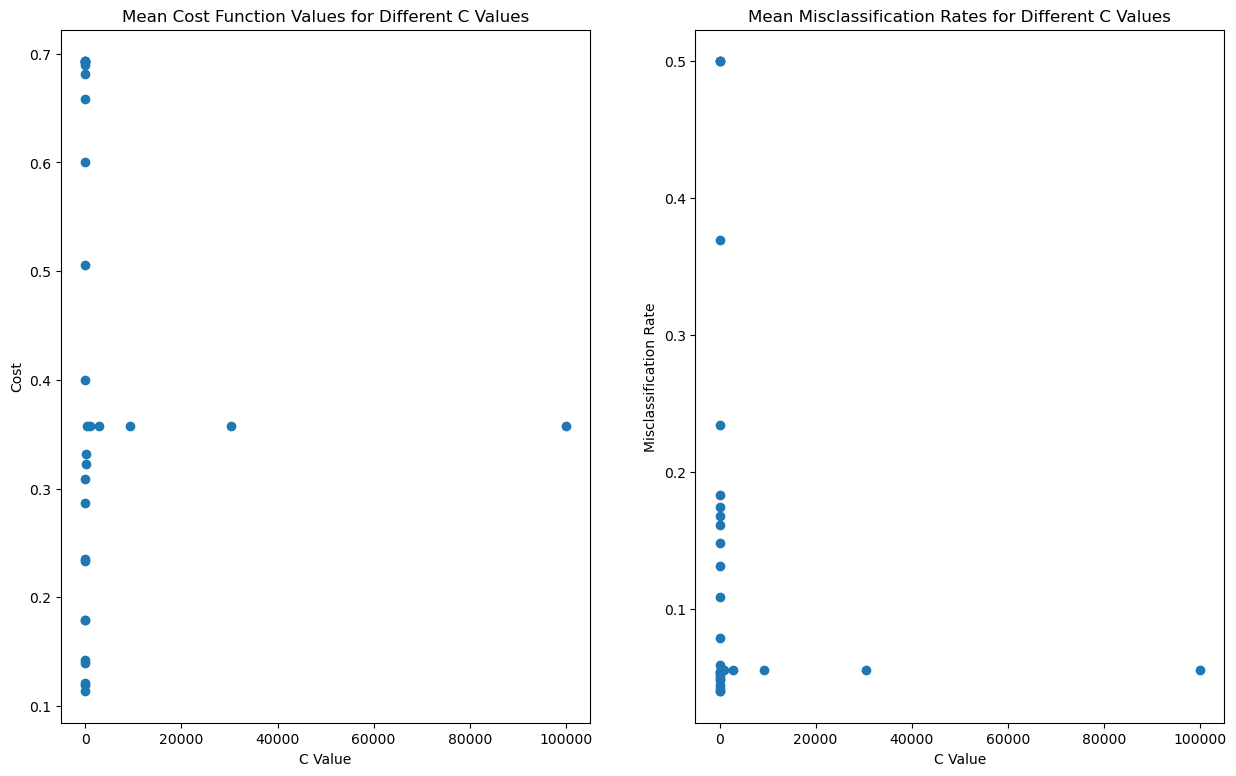

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

ax1.scatter(C_range, losses)

ax2.scatter(C_range, 1-cv_accuracies)

idx_min_loss = np.argmin(losses)
print('When the mean cost is the smallest, C value = ', C_range[idx_min_loss])
idx_min_misclassification = np.argmax(cv_accuracies)
print('When the mean classification rate is the smallest, C value = ',
      C_range[idx_min_misclassification])
print('When C value = ', C_range[idx_min_loss], ', it has the smallest mean cost = ',
      losses[idx_min_loss], ', and the biggest accuracy rate = ', cv_accuracies[idx_min_loss])

ax1.set_xlabel('C Value')
ax1.set_ylabel('Cost')
ax1.set_title(r'Mean Cost Function Values for Different C Values')
ax2.set_xlabel('C Value')
ax2.set_ylabel('Misclassification Rate')
ax2.set_title(r'Mean Misclassification Rates for Different C Values')
save_fig("d8", tight_layout=False)
plt.show()

## Task D9

Give a short interpretation of your results. Which regularisation hyperparameter value would you select and why? What was the impacting of using 10-fold cross-validation instead of a fixed validation set?


## Task D10


In [61]:
# Grid search
# https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee
# https://github.com/jstremme/l2-regularized-logistic-regression/blob/master/scikit-learn_comparison.ipynb
# https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb
# https://juejin.cn/post/7120089516597051428
# https://github.com/scikit-learn/scikit-learn/issues/6619
# https://medium.com/@matthew1992/model-selection-in-machine-learning-f2dc41465230

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV


# # Define hyperparameter grid
params = {'alpha': 1/C_range}
sgd_classifier = SGDClassifier(
    loss='log_loss', penalty='l2', max_iter=N_EPOCHS, random_state=5508)
# # Perform grid search cross-validation to find the best value of C
gs_sgd = GridSearchCV(
    sgd_classifier, param_grid=params, cv=10, scoring='accuracy')
gs_sgd.fit(x_train_scaled, y_train)

train_pred = gs_sgd.predict_proba(x_train_scaled)
#! should I add the penalty for ridge regression?
# train_loss = log_loss(y_train, train_pred) + penalty
train_loss = log_loss(y_train, train_pred)

val_pred = gs_sgd.predict_proba(x_val_scaled)
#! should I add the penalty for ridge regression?
# val_loss = log_loss(y_val, val_pred) + penalty
val_loss = log_loss(y_val, val_pred)

train_accuracy = gs_sgd.score(x_train_scaled, y_train)
val_accuracy = gs_sgd.score(x_val_scaled, y_val)

# # Get the best value of C
best_alpha = gs_sgd.best_params_['alpha']
best_C = 1/best_alpha

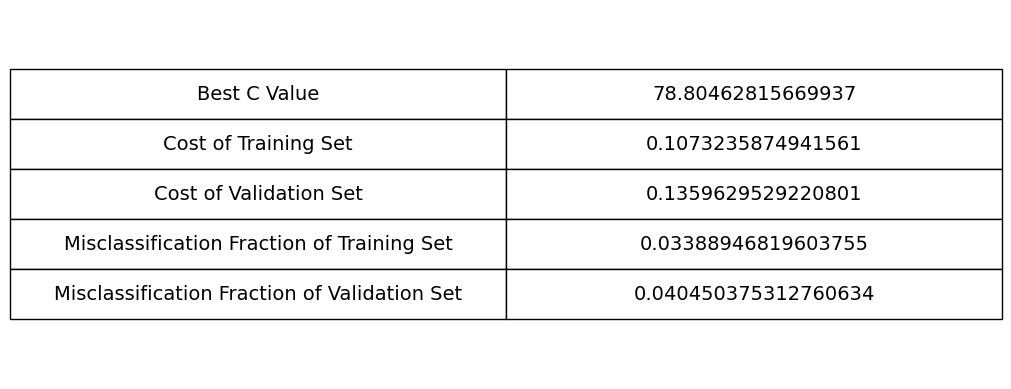

In [62]:
table_content = [['Best C Value', best_C], ['Cost of Training Set', train_loss], [
    'Cost of Validation Set', val_loss], ['Misclassification Fraction of Training Set', 1-train_accuracy], ['Misclassification Fraction of Validation Set', 1-val_accuracy]]

# Reference: https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
# ax.axis('tight')

table = ax.table(cellText=table_content, loc='center', cellLoc='center')
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(14)

# Adjust cell heights and widths
table.scale(2, 3)
# plt.savefig('d10.png', bbox_inches='tight', pad_inches=0.1)
save_fig("d10", tight_layout=False, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Task D12


In [136]:
# Train logistic regression model with the best value of C
best_model = SGDClassifier(
    loss='log_loss', penalty='l2', alpha=1/best_C, max_iter=N_EPOCHS, random_state=5508)
best_model.fit(x_train_scaled, y_train)
LR3 = best_model

In [64]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(best_model, x_val_scaled, y_val, cv=3,
                             method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores)

0.7561660175909868


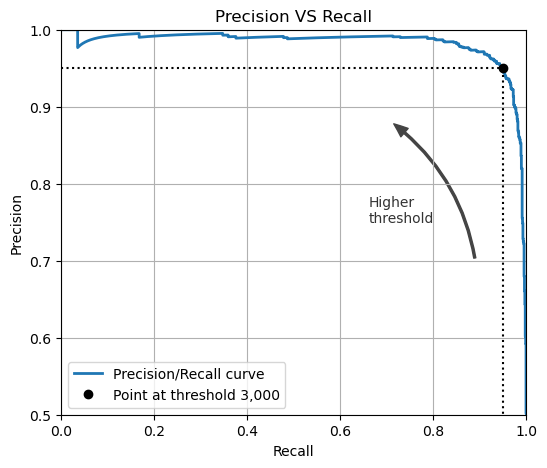

<Figure size 640x480 with 0 Axes>

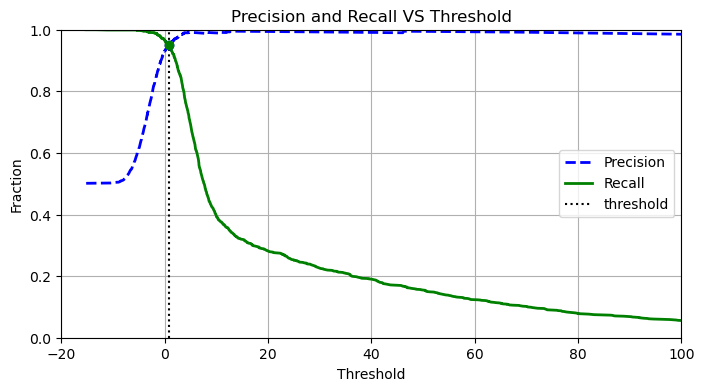

In [84]:
import matplotlib.patches as patches

idx = 0
for i in range(len(thresholds)):
    if precisions[i] == recalls[i]:
        idx = i
threshold = thresholds[idx]
print(threshold)


plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, linewidth=1.5, label="Precision/Recall curve")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.89, 0.70), (0.71, 0.88),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.66, 0.75, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precision VS Recall')
plt.axis([0, 1, 0.5, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()
save_fig("d12_precision_vs_recall",
         tight_layout=False, bbox_inches='tight')
plt.figure(figsize=(8, 4))


plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=1.5)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=1.5)


plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")


plt.axis([-20, 100, 0, 1])
plt.grid()



plt.xlabel("Threshold")
plt.ylabel("Fraction")
plt.title('Precision and Recall VS Threshold')


plt.legend(loc="center right")
save_fig("d12_precision_recall_vs_threshold_plot",
         tight_layout=False, bbox_inches='tight')
plt.show()

The precision and recall curves intersect at approximately the threshold value of 0, indicating a crucial point of balance between precision and recall. Initially, the precision value starts at 0.5 and then rapidly ascends to a high fraction at around 0.95. Conversely, the recall curve exhibits a steep decrease following its intersection with the precision curve.

I opt for a threshold value of 0.7562 (rounded to four decimal digits) which closely aligns with the intersection point of the precision and recall curves. This choice is motivated by the fact that at this threshold, both precision and recall hover around 95%. Such high values imply that instances predicted as class label 1 are mostly correct, and nearly all actual instances with class label 1 are accurately predicted. Consequently, the model demonstrates high accuracy and completeness in its positive predictions.


## Task D13


In [108]:
# task d13: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
# https://datascience.stackexchange.com/questions/89880/classification-threshold-tuning-with-gridsearchcv
# https://vitaliset.github.io/threshold-dependent-opt/
# https://datascience.stackexchange.com/questions/89880/classification-threshold-tuning-with-gridsearchcv
# https://vitaliset.github.io/threshold-dependent-opt/


# Use f1 score as the metric to find the optimal threshold

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import f1_score

threshold_values = np.linspace(-1, 1, 50)
best_threshold = None
best_performance = -1

sgd_clf = SGDClassifier(
    loss='log_loss', penalty='l2', alpha=1/best_C, max_iter=N_EPOCHS, random_state=5508)


skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=5508)

y_train_array = y_train.to_numpy()

for threshold in threshold_values:
    performance = []
    for train_index, test_index in skfolds.split(x_train_scaled, y_train_array):
        clone_clf = clone(sgd_clf)
        X_train_folds = x_train_scaled[train_index]
        y_train_folds = y_train_array[train_index]
        X_test_fold = x_train_scaled[test_index]
        y_test_fold = y_train_array[test_index]

        clone_clf.fit(X_train_folds, y_train_folds)
        y_scores = clone_clf.decision_function(X_test_fold)
        y_pred = (y_scores > threshold)
        performance.extend([f1_score(y_test_fold, y_pred)])

    performance = np.mean(performance)
    if performance > best_performance:
        best_performance = performance
        best_threshold = threshold

print('best threshold: ', best_threshold)
print('best f1-score: ', best_performance)

best threshold:  0.06122448979591821
best f1-score:  0.9590542288390292


The threshold value I obtained from implementing a grid search on our own is around 0.0612. It is different from the threshold I chose in D12 because I was choosing it roughly based on the curve where both precision and recall is above 0.95. The threshold value found in D13 is based on the F1-score, which balances the precision and recall.

# Analysing the performance closer

## Task D14

### LR1
My implementation of the logistic regression without regularisation and with a fixed validation set.

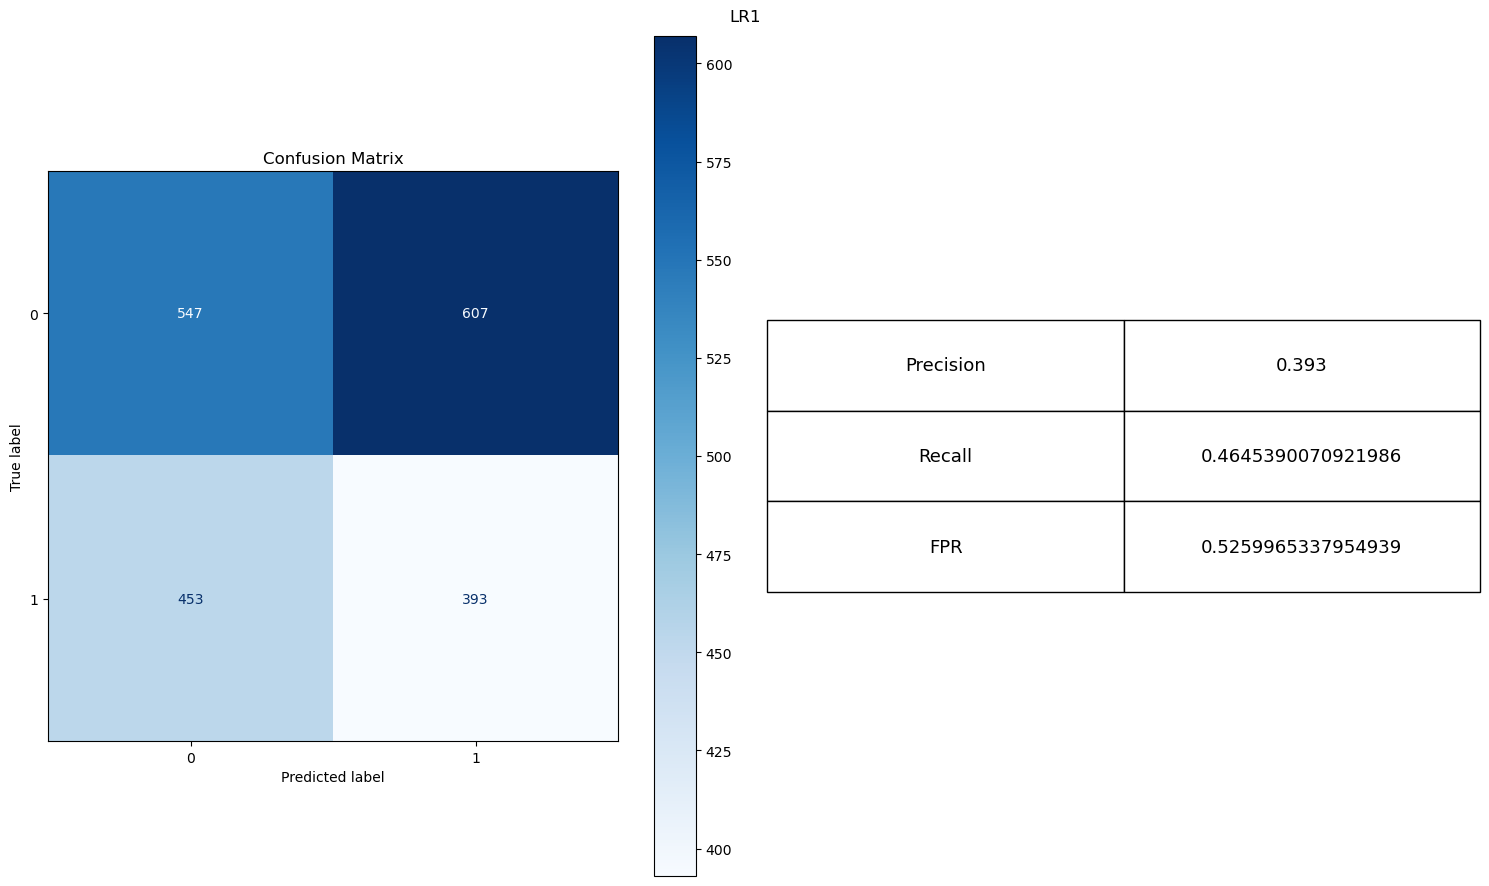


****************************Model: LR1
Confusion Matrix:
 [[547 607]
 [453 393]]
Precision: 0.393
Recall: 0.4645390070921986
FPR: 0.5259965337954939


In [135]:
from sklearn.metrics import ConfusionMatrixDisplay
LR1 = model2   #! should be model1 or model2? what does with a fixed validation set mean?
LR1_y_pred = LR1.predict(x_test_b_scaled)


def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])


def precision_recall_fpr(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return precision, recall, fpr


y_test = test_labels
LR1_cm = confusion_matrix(LR1_y_pred, y_test)
LR1_precision, LR1_recall, LR1_fpr = precision_recall_fpr(LR1_cm)
LR1_data = [['Precision', LR1_precision], [
    'Recall', LR1_recall], ['FPR', LR1_fpr]]
disp = ConfusionMatrixDisplay(confusion_matrix=LR1_cm, display_labels=[
                              0, 1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title('Confusion Matrix')

ax2.axis('off')
ax2.axis('tight')
ax2.margins(x=0, y=0)
table = ax2.table(cellText=LR1_data, loc='center', cellLoc='center')
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(13)

# Adjust cell heights and widths
table.scale(1, 4.5)
fig.suptitle('LR1')
save_fig("d14_lr1", tight_layout=True, bbox_inches='tight', pad_inches=0.05)
plt.show()
# https://www.kaggle.com/code/hammadzahidali/comparing-classification-models-sklearn-iris-data
print('\n****************************Model: ' + 'LR1')
print('Confusion Matrix:\n {}'.format(LR1_cm))
print('Precision: {}'.format(LR1_precision))
print('Recall: {}'.format(LR1_recall))
print('FPR: {}'.format(LR1_fpr))

### LR2

In [ ]:
# confusion matrix and fpr: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# precision score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# recall score: 
# confusion matrix display: https://medium.com/@anthony.demeusy/machine-learning-tips-adjusting-decision-threshold-for-binary-classification-c937d7046a43
# confusion matrix display: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
# how to get fp and tn for fpr_socre: https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules




def fpr_score(fp, tn):
    return fp/(fp+tn)

### LR3